<a href="https://colab.research.google.com/github/davihaikel/Alura-Store/blob/main/AluraStoreBr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importa√ß√£o dos dados



In [17]:
import pandas as pd
import matplotlib.pyplot as plt

urls = {
        "Loja 1": "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv",
        "Loja 2": "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv",
        "Loja 3": "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv",
        "Loja 4": "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv",
}

df= {}

for nome_lojas, url, in urls.items():
  df[nome_lojas] = pd.read_csv(url)
df['Loja 3'].head(10)

Produto   Categoria do Produto    Pre√ßo      Frete  \
0        Secadora de roupas       eletrodomesticos  1713.50  88.823159   
1                    C√¥moda                 moveis   386.81  18.180908   
2                    Viol√£o  instrumentos musicais   404.62  23.197592   
3             Bola de v√¥lei        esporte e lazer    78.40   4.463341   
4             Guarda roupas                 moveis   694.76  34.578319   
5                Impressora            eletronicos   307.64  13.965344   
6  Carrinho controle remoto             brinquedos    74.26   4.237248   
7     Cadeira de escrit√≥rio                 moveis   619.44  33.514421   
8                  Pandeiro  instrumentos musicais    58.01   3.619963   
9                  Faqueiro  utilidades domesticas    44.73   0.000000   

  Data da Compra          Vendedor Local da compra  Avalia√ß√£o da compra  \
0     17/12/2021    Camila Ribeiro              CE                    4   
1     10/02/2021     Larissa Alves              RS                    3   
2     22/01/2023    Lucas Oliveira              SP                    5   
3     22/03/2022       Pedro Gomes              BA                    4   
4     12/01/2022     Bianca Santos              SP                    1   
5     20/11/2022  Mariana Ferreira              MG                    5   
6     07/07/2020   Bruno Rodrigues              SP                    2   
7     01/05/2022  Isabella Pereira              SP                    5   
8     27/10/2021     Larissa Alves              MG                    5   
9     03/05/2022     Felipe Santos              RJ                    5   

  Tipo de pagamento  Quantidade de parcelas    lat    lon  
0    cartao_credito                       4  -5.20 -39.53  
1    cartao_credito                       1 -30.17 -53.50  
2    cartao_credito                       3 -22.19 -48.79  
3    cartao_credito                       6 -13.29 -41.71  
4    cartao_credito                       1 -22.19 -48.79  
5    cartao_credito                       5 -18.10 -44.38  
6            boleto                       1 -22.19 -48.79  
7            boleto                       1 -22.19 -48.79  
8    cartao_credito                       3 -18.10 -44.38  
9            boleto                       1 -22.25 -42.66

## EDA

In [18]:
def tratamento(loja):
  nulos = loja.isnull().sum()
  duplicados = loja.duplicated().sum()
  return f'Valores nulos: {nulos}\n Linhas duplicadas: {duplicados}'

print(tratamento(loja))

Valores nulos: Produto                   0
Categoria do Produto      0
Pre√ßo                     0
Frete                     0
Data da Compra            0
Vendedor                  0
Local da compra           0
Avalia√ß√£o da compra       0
Tipo de pagamento         0
Quantidade de parcelas    0
lat                       0
lon                       0
dtype: int64
 Linhas duplicadas: 0


In [19]:
print(tratamento(loja2))

Valores nulos: Produto                   0
Categoria do Produto      0
Pre√ßo                     0
Frete                     0
Data da Compra            0
Vendedor                  0
Local da compra           0
Avalia√ß√£o da compra       0
Tipo de pagamento         0
Quantidade de parcelas    0
lat                       0
lon                       0
dtype: int64
 Linhas duplicadas: 0


In [20]:
print(tratamento(loja3))

Valores nulos: Produto                   0
Categoria do Produto      0
Pre√ßo                     0
Frete                     0
Data da Compra            0
Vendedor                  0
Local da compra           0
Avalia√ß√£o da compra       0
Tipo de pagamento         0
Quantidade de parcelas    0
lat                       0
lon                       0
dtype: int64
 Linhas duplicadas: 0


In [21]:
print(tratamento(loja4))

Valores nulos: Produto                   0
Categoria do Produto      0
Pre√ßo                     0
Frete                     0
Data da Compra            0
Vendedor                  0
Local da compra           0
Avalia√ß√£o da compra       0
Tipo de pagamento         0
Quantidade de parcelas    0
lat                       0
lon                       0
dtype: int64
 Linhas duplicadas: 0


#1. An√°lise do faturamento


O faturamento da Loja 1 foi de R$1534509.12
O faturamento da Loja 2 foi de R$1488459.06
O faturamento da Loja 3 foi de R$1464025.03
O faturamento da Loja 4 foi de R$1534509.12


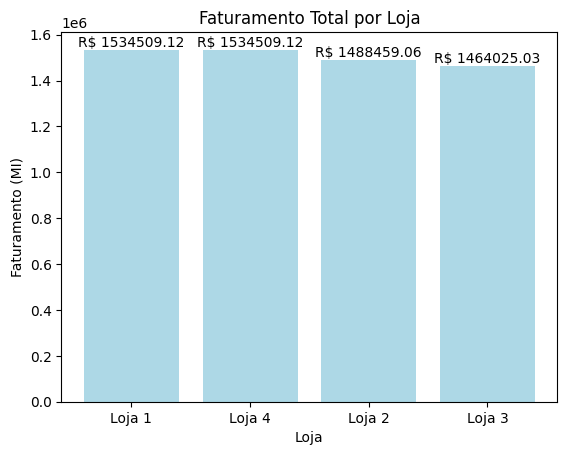

In [22]:
def faturamento (lista_de_lojas, nomes_lojas):
  resultados = []

  for loja, nome in zip(lista_de_lojas, nomes_lojas):
    fat = loja['Pre√ßo'].sum()
    resultados.append({'loja': nome,
                       'faturamento': fat})
    print(f'O faturamento da {nome} foi de R${fat :.2f}')

  df_faturamento = pd.DataFrame(resultados)
  df_faturamento = df_faturamento.sort_values(by = 'faturamento', ascending = False)

##Grafico

  plt.bar(df_faturamento['loja'], df_faturamento['faturamento'], color = 'lightblue')
  for i, valor in enumerate(df_faturamento['faturamento']):
    plt.text(i, valor, f'R$ {valor :.2f}', ha = 'center', va = 'bottom')
  plt.title('Faturamento Total por Loja')
  plt.xlabel('Loja')
  plt.ylabel('Faturamento (MI)')
  plt.show()

faturamento([loja, loja2, loja3, loja4], ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4'])

# 2. Vendas por Categoria


    Categoria do Produto  Quantidade Vendida    loja
0             brinquedos                 338  Loja 4
0             brinquedos                 324  Loja 1
0             brinquedos                 315  Loja 3
0             brinquedos                 313  Loja 2
1       eletrodomesticos                 312  Loja 1
1       eletrodomesticos                 305  Loja 2
1       eletrodomesticos                 278  Loja 3
1       eletrodomesticos                 254  Loja 4
2            eletronicos                 451  Loja 3
2            eletronicos                 451  Loja 4
2            eletronicos                 448  Loja 1
2            eletronicos                 422  Loja 2
3        esporte e lazer                 284  Loja 1
3        esporte e lazer                 277  Loja 3
3        esporte e lazer                 277  Loja 4
3        esporte e lazer                 275  Loja 2
4  instrumentos musicais                 224  Loja 2
4  instrumentos musicais                 182  

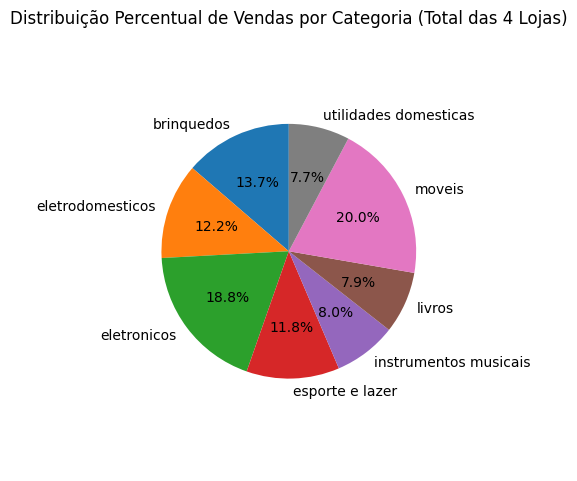

In [23]:
resultados = []

for nome_loja, url in urls.items():
  df = pd.read_csv(url)
  contagem = df.groupby('Categoria do Produto').size().reset_index(name = 'Quantidade Vendida')
  contagem['loja'] = nome_loja
  resultados.append(contagem)

vendas_por_categoria = pd.concat(resultados)
print(vendas_por_categoria.sort_values(by = ['Categoria do Produto', 'Quantidade Vendida'], ascending = (True, False)))

##Grafico
vendas_totais_categoria = vendas_por_categoria.groupby('Categoria do Produto')['Quantidade Vendida'].sum().reset_index()

plt.figure(figsize=(5, 5))
plt.pie(
    vendas_totais_categoria['Quantidade Vendida'],
    labels=vendas_totais_categoria['Categoria do Produto'],
    autopct='%1.1f%%',
    startangle=90,
)
plt.title('Distribui√ß√£o Percentual de Vendas por Categoria (Total das 4 Lojas)')
plt.axis('equal')
plt.tight_layout()
plt.show()


# 3. M√©dia de Avalia√ß√£o das Lojas

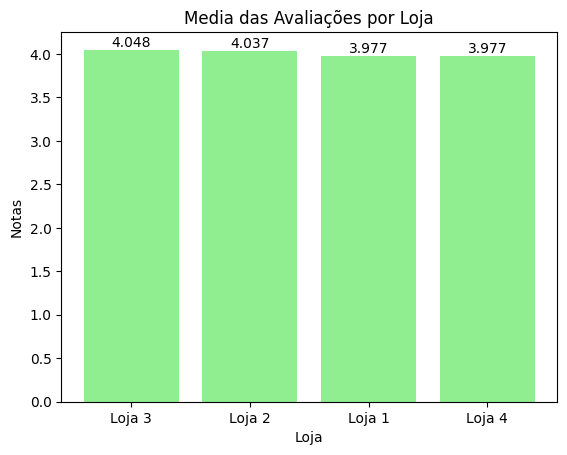

     loja  media_avaliacao
2  Loja 3         4.048326
1  Loja 2         4.037304
0  Loja 1         3.976685
3  Loja 4         3.976685


In [24]:
resultados = []
lista_de_lojas = [loja, loja2, loja3, loja4]
nomes_lojas = ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']

for loja, nome in zip(lista_de_lojas, nomes_lojas):
  media = loja['Avalia√ß√£o da compra'].mean()
  resultados.append({'loja': nome, 'media_avaliacao': media})

df_resultados = pd.DataFrame(resultados)
df_resultados = df_resultados.sort_values(by = 'media_avaliacao', ascending = False)

## Grafico

plt.bar(df_resultados['loja'], df_resultados['media_avaliacao'], color = 'lightgreen')
for i, valor in enumerate(df_resultados['media_avaliacao']):
  plt.text(i, valor, f'{valor :.3f}', ha = 'center', va = 'bottom')
plt.title('Media das Avalia√ß√µes por Loja')
plt.xlabel('Loja')
plt.ylabel('Notas')
plt.show()
print(df_resultados)

# 4. Produtos Mais e Menos Vendidos

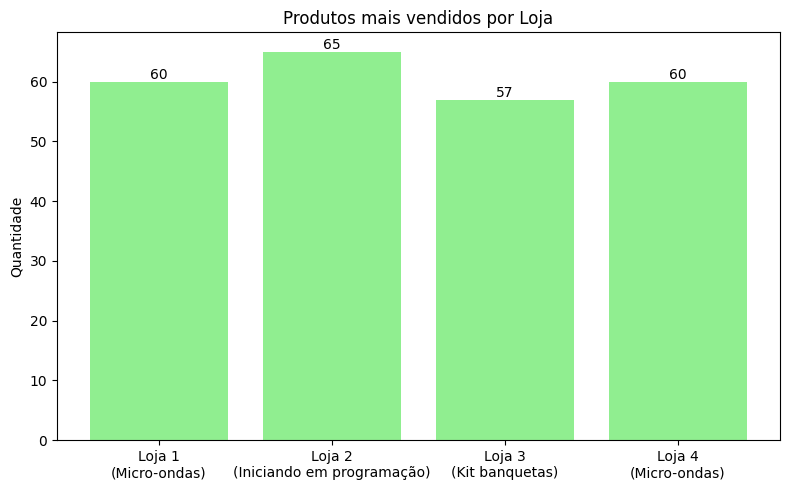

In [25]:
resultados = [] #lista para armazenar o dicionario de valores
lista_de_lojas = [loja, loja2, loja3, loja4]
nomes_lojas= ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']

for loja, nome in zip(lista_de_lojas, nomes_lojas): # cria uma lista com os iteraveis da lista e os respectivos nomes
  contagem = loja['Produto'].value_counts() #conta as linhas da coluna produto

  mais_vendido = contagem.idxmax() #qual produto foi mais vendido
  qtd_mais_vendido = contagem.max() #conta quantas vezes o produto que mais se repete aparece

  menos_vendido = contagem.idxmin() #qual produto foi menos vendido
  qtd_menos_vendido = contagem.min() #conta quantas vezes o produto que menos se repete aparece

  resultados.append({'loja': nome,
                     'mais_vendido': mais_vendido,
                     'qtd_mais_vendido': qtd_mais_vendido,
                     'menos_vendido': menos_vendido,
                     'qtd_menos_vendido': qtd_menos_vendido}) #envia os valores para lista vazia

df_resultados = pd.DataFrame(resultados) #transforma a lista de resultado em um dataframe
##Grafico mais vendidos

df_resultados['label'] = df_resultados['loja'] + '\n(' + df_resultados['mais_vendido'] + ')' #Formata√ß√£o para aparecer qual loja e o seu produto mais vendido

fig = plt.figure(figsize = (8, 5)) # aumenta o tamanho do gr√°fico
plt.bar(df_resultados['label'], df_resultados['qtd_mais_vendido'], color = 'lightgreen') #diz o que deve aparecer no gr√°fico
for i, valor in enumerate(df_resultados['qtd_mais_vendido']):
  plt.text(i, valor, f'{valor}', ha = 'center', va = 'bottom') #loop para indicar os valores de cada barra do gr√°fico
plt.title('Produtos mais vendidos por Loja')
plt.ylabel('Quantidade')
plt.tight_layout() #a ultima da barra da direita estava ficando para fora do gr√°fico
plt.show()
#print(df_resultados)

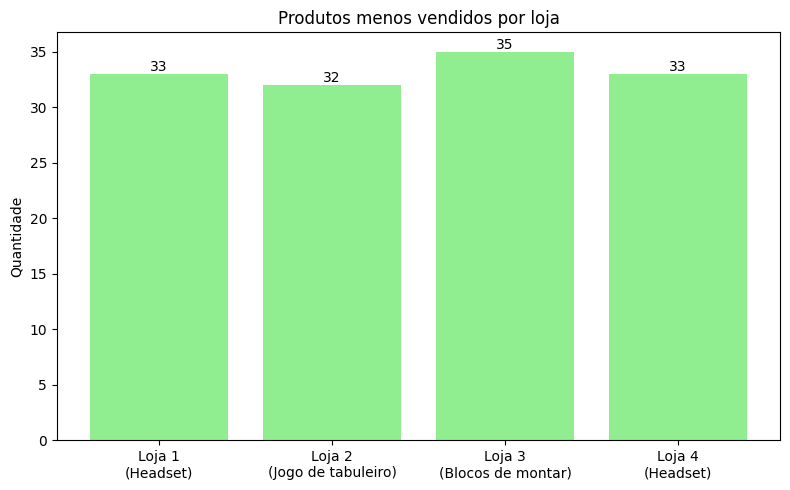

In [26]:
## Grafico menos vendidos
df_resultados['label'] = df_resultados['loja'] + '\n(' + df_resultados['menos_vendido'] + ')' #Formata√ß√£o para aparecer qual loja e o seu produto menos vendido

fig = plt.figure(figsize = (8, 5)) # aumenta o tamanho do gr√°fico
plt.bar(df_resultados['label'], df_resultados['qtd_menos_vendido'], color = 'lightgreen') #diz o que deve aparecer no gr√°fico
for i, valor in enumerate(df_resultados['qtd_menos_vendido']):
  plt.text(i, valor, f'{valor}', ha = 'center', va = 'bottom') #loop para indicar os valores de cada barra do gr√°fico
plt.title('Produtos menos vendidos por loja')
plt.ylabel('Quantidade')
plt.tight_layout() #a ultima da barra da direita estava ficando para fora do gr√°fico
plt.show()
#print(df_resultados)

# 5. Frete M√©dio por Loja


In [27]:
resultados = []

lista_lojas = [loja, loja2, loja3, loja4]
nomes_lojas = ['Loja 1' , 'Loja 2', 'Loja 3', 'Loja 4']

for loja, nome in zip(lista_lojas, nomes_lojas):
  frete_medio = loja['Frete'].mean()
  resultados.append({'loja': nome, 'frete_medio': frete_medio}) #calcula a media de cada iteravel passando pela lista de datasets das lojas na coluna 'frete'

df_resultados = pd.DataFrame(resultados)
df_resultados = df_resultados.sort_values(by = 'frete_medio', ascending = False)
print(df_resultados)

     loja  frete_medio
0  Loja 1    34.691805
3  Loja 4    34.691805
1  Loja 2    33.621941
2  Loja 3    33.074464


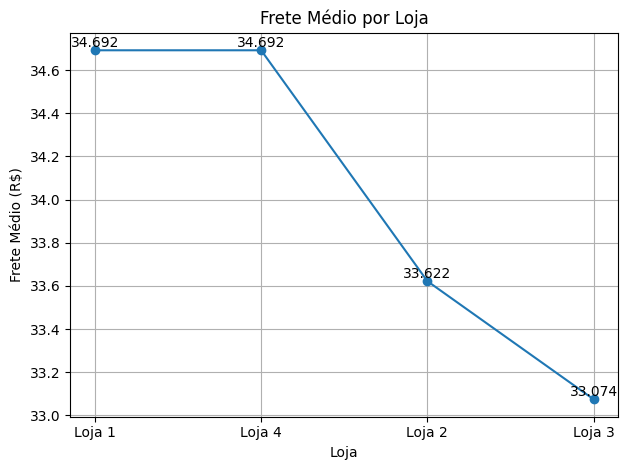

In [28]:
## Gr√°fico
plt.plot(df_resultados['loja'], df_resultados['frete_medio'], marker='o', linestyle='-')
for i, valor in enumerate(df_resultados['frete_medio']):
  plt.text(i, valor, f'{valor:.3f}', ha = 'center', va = 'bottom')
plt.title('Frete M√©dio por Loja')
plt.xlabel('Loja')
plt.ylabel('Frete M√©dio (R$)')
plt.grid(True)
plt.tight_layout()
plt.show()



##MAPA DE CALOR


In [29]:
pip install folium

In [30]:
import folium
from folium.plugins import HeatMap

In [31]:
m = folium.Map(location=[loja3['lat'].mean(), loja3['lon'].mean()], zoom_start=4)

heat_data = loja3[['lat', 'lon']].values.tolist()
HeatMap(heat_data).add_to(m)

m.save('mapa_calor_loja3.html')
m


## üìå **Objetivo**

Esta an√°lise tem como objetivo identificar qual das quatro lojas da Alura Store apresenta o pior desempenho e, com base nisso, auxiliar na tomada de decis√£o sobre onde cessar investimentos e concentrar recursos nas opera√ß√µes mais lucrativas.

---

## üí∞ **Faturamento por Loja**

Com base nos dados do √∫ltimo ano, a **Loja 1 foi a que mais faturou**, com um total de **R$1.534.509.12*, seguida pelas Lojas 4 e 2.  
A **Loja 3 apresentou o menor faturamento**, com **R$1.464.025.03**, uma diferen√ßa de mais de **R$70 mil** em rela√ß√£o √† Loja 1.

*A discrep√¢ncia √© significativa e justifica uma an√°lise mais profunda sobre o desempenho da Loja 3.*

---

## üì¶ **Categorias de Produtos**

Entre todas as lojas, as principais categorias vendidas foram:

- **M√≥veis**
- **Eletr√¥nicos**
- **Brinquedos**

A categoria de **utilidades dom√©sticas** representou apenas **7,7% das vendas totais**, sendo a **Loja 1** a que menos vendeu nessa categoria (**171 produtos**), seguida pela **Loja 3** (**177 produtos**).

Contudo, a categoria de **M√≥veis** que representa **20% das vendas totais**, a **Loja 3** foi a que mais vendeu na categoria(**499 produtos**).

---

## ‚≠ê **Avalia√ß√µes dos Clientes**

Apesar do baixo faturamento, a **Loja 3 apresenta boa m√©dia de avalia√ß√£o dos clientes: 4,0 estrelas**, superior √† m√©dia das demais lojas, com **desvio padr√£o de apenas 0,03 entre as 4 lojas**. Isso indica que a experi√™ncia do cliente √© consistente, mas n√£o est√° alavancando as vendas da Loja com melhor avalia√ß√£o (**Loja 3**).

---

## üõí **Produtos Mais e Menos Vendidos**

- A **Loja 2** lidera nas vendas do produto mais popular (*Curso: Iniciando em Programa√ß√£o*), com **65 unidades vendidas**.
- A **Loja 3** est√° em √∫ltimo lugar nesse quesito, com **57 unidades do seu produto mais vendido** (*Kit de Banquetas*).

Sobre os produtos menos vendidos:
- As **Lojas 1 e 4** empataram com **33 vendas** do item menos vendido (*Headset*).
- A **Loja 3**, mesmo nesse aspecto, teve baixa performance, com **apenas 35 vendas** (*Bloco de montar*).

---

## üöö **Frete M√©dio**

- **Lojas 1 e 4**: R$35,00 (aproximadamente)
- **Loja 2**: R$33,00
- **Loja 3**: R$33,00

*O custo m√©dio de frete √© uniforme entre as lojas, n√£o influenciando significativamente o desempenho da Loja 3.*

---

## üìç **Localiza√ß√£o e Vendas**

Com base nas coordenadas geogr√°ficas (lat/lon), o mapa de calor mostra que as todas as lojas est√£o distribuindo seus produtos para as mesmas localidades, ou seja, podemos descartar o fato geogr√°fico estar impactando negativamente no desempenho financeiro da **Loja 3**.

---

## ‚úÖ **Conclus√£o**

Apesar da **√ìtima avalia√ß√£o dos clientes**, a **Loja 3 apresenta o pior desempenho em quase todas as m√©tricas financeiras e operacionais analisadas**.

Antes de encerrar a opera√ß√£o da loja, recomenda-se:

- Investigar os custos operacionais (estoque, log√≠stica, marketing).
- Analisar se o p√∫blico-alvo da Loja 3 est√° bem definido.
- Verificar se as avalia√ß√µes do cliente tem liga√ß√£o com alguma outra m√©trica (*Vendedor, Frete, Pre√ßo*).

Portanto, com base nos dados atuais, √© recomendado **uma an√°lise mais profunda**, uma vez que a Loja 3 **domina as vendas** da principal categoria de produtos da *Alura Store*.
